Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 99% 222M/225M [00:00<00:00, 635MB/s] 
100% 225M/225M [00:00<00:00, 661MB/s]
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6537 - loss: 0.9467 - val_accuracy: 0.8628 - val_loss: 0.3807
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8752 - loss: 0.3515 - val_accuracy: 0.8663 - val_loss: 0.3683
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9174 - loss: 0.2515 - val_accuracy: 0.8651 - val_loss: 0.3931
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9289 - loss: 0.2215 - val_accuracy: 0.8628 - val_loss: 0.3806
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9432 - loss: 0.1641 - val_accuracy: 0.8744 - val_loss: 0.3759
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.8527 - loss: 0.3870 - val_accuracy: 0.8733 - val_loss: 0.3912
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8906 - loss: 0.2920 - val_accuracy: 0.8756 - val_loss: 0.3880
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.9110 - loss: 0.2275 - val_accuracy: 0.

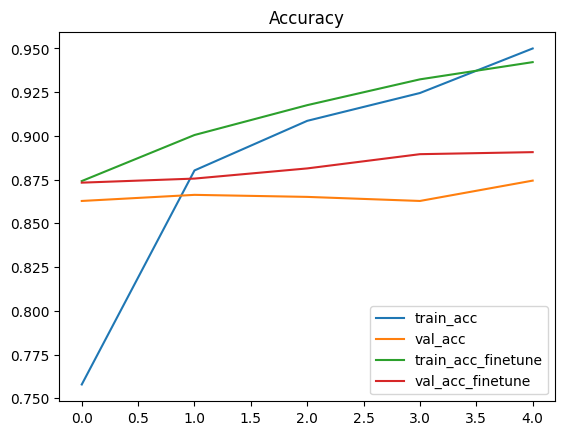

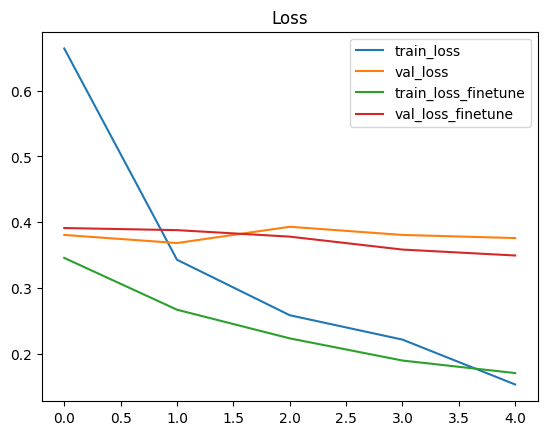

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔮 Predicted Class: daisy


In [ ]:
!pip install -q kaggle

import os, json

# Create Kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# 🔑 Replace with your Kaggle API username + key from kaggle.json
kaggle_json = {
    "username": "YOUR_KAGGLE_USERNAME",
    "key": "YOUR_KAGGLE_KEY"
}

# Save kaggle.json
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_json, f)

!chmod 600 /root/.kaggle/kaggle.json

# ======================================================
# 2. Download Dataset from Kaggle
# ======================================================
# Example: Flowers Recognition dataset
!kaggle datasets download -d alxmamaev/flowers-recognition -p /content

import zipfile

zip_path = "/content/flowers-recognition.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

data_dir = "/content/dataset/flowers"
os.listdir(data_dir)

# ======================================================
# 3. Preprocess Dataset
# ======================================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# 4. Load Pre-trained Model (MobileNetV2)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # Freeze base layers

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 5. Train Model (Feature Extraction)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# 6. Fine-tuning (Train last 30 layers of base model)

base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# 7. Evaluate Model

loss, acc = model.evaluate(val_data)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")

# ======================================================
# 8. Plot Accuracy & Loss
# ======================================================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history_fine.history['accuracy'], label='train_acc_finetune')
plt.plot(history_fine.history['val_accuracy'], label='val_acc_finetune')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_fine.history['loss'], label='train_loss_finetune')
plt.plot(history_fine.history['val_loss'], label='val_loss_finetune')
plt.title("Loss")
plt.legend()
plt.show()

# ======================================================
# 9. Prediction on New Image
# ======================================================
import numpy as np
from tensorflow.keras.preprocessing import image

sample_img_path = "/content/dataset/flowers/daisy/5547758_eea9edfd54_n.jpg"

img = image.load_img(sample_img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
print("🔮 Predicted Class:", list(train_data.class_indices.keys())[class_idx])


In [ ]:
# Save model
model.save("/content/flower_classifier.h5")

# Load model (anytime later)
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/flower_classifier.h5")


In [ ]:
import glob

test_images = glob.glob("/content/dataset/flowers/rose/*.jpg")[:5]

for img_path in test_images:
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    print(f"Image: {os.path.basename(img_path)} --> {list(train_data.class_indices.keys())[class_idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Image: 5002450022_33337e895b_n.jpg --> rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Image: 1402130395_0b89d76029.jpg --> rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Image: 5001852101_877cb2ae9b_n.jpg --> rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Image: 272481307_1eb47ba3e0_n.jpg --> rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Image: 505517255_cfbb6f6394.jpg --> rose


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels and predictions
val_labels = val_data.classes
val_preds = model.predict(val_data)
val_preds = np.argmax(val_preds, axis=1)

print("Classification Report:\n", classification_report(val_labels, val_preds, target_names=list(train_data.class_indices.keys())))


27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step
Classification Report:
               precision    recall  f1-score   support

       daisy       0.17      0.18      0.18       152
   dandelion       0.18      0.18      0.18       210
        rose       0.20      0.17      0.18       156
   sunflower       0.22      0.24      0.23       146
       tulip       0.20      0.20      0.20       196

    accuracy                           0.19       860
   macro avg       0.19      0.20      0.19       860
weighted avg       0.19      0.19      0.19       860



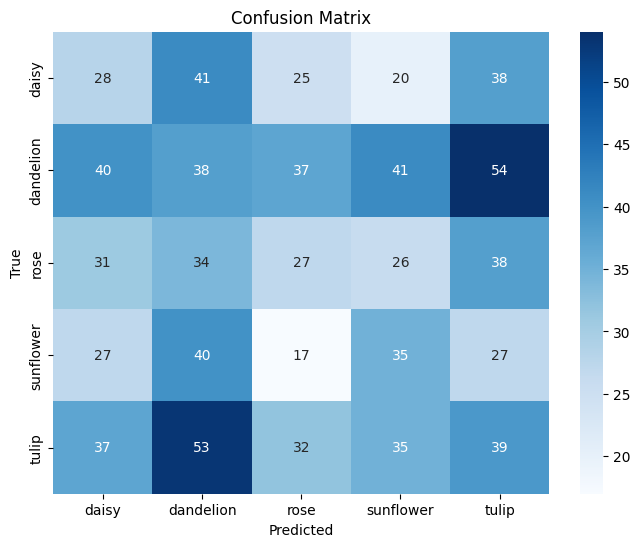

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(train_data.class_indices.keys()), yticklabels=list(train_data.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save("flower_classification_model.h5")
print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("flower_classification_model.h5")


In [ ]:
def predict_flower(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    return list(train_data.class_indices.keys())[class_idx]

print("🔮 Prediction:", predict_flower("/content/dataset/flowers/rose/12240303_80d87f77a3_n.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
🔮 Prediction: rose


In [ ]:
test_images = [
    "/content/dataset/flowers/daisy/5547758_eea9edfd54_n.jpg",
    "/content/dataset/flowers/dandelion/7355522_b66e5d3078_m.jpg",
    "/content/dataset/flowers/sunflower/6953297_8576bf4ea3.jpg"
]

for img_path in test_images:
    print(f"Image: {img_path} -> Prediction: {predict_flower(img_path)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Image: /content/dataset/flowers/daisy/5547758_eea9edfd54_n.jpg -> Prediction: daisy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Image: /content/dataset/flowers/dandelion/7355522_b66e5d3078_m.jpg -> Prediction: dandelion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image: /content/dataset/flowers/sunflower/6953297_8576bf4ea3.jpg -> Prediction: sunflower


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


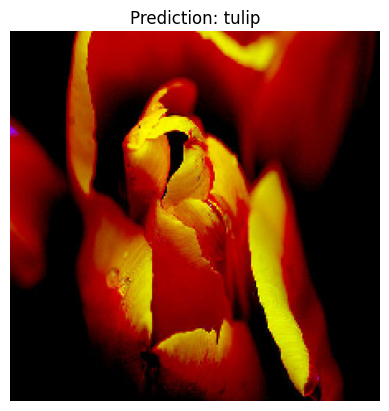

In [ ]:
def show_prediction(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Prediction: " + predict_flower(img_path))
    plt.show()

show_prediction("/content/dataset/flowers/tulip/10791227_7168491604.jpg")


In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8962 - loss: 0.3589
Validation Accuracy: 89.07%


In [ ]:
model.save("flower_transfer_learning.h5")
print("✅ Model saved successfully")


✅ Model saved successfully


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("flower_transfer_learning.h5")
print("📂 Model loaded successfully")


📂 Model loaded successfully


In [ ]:
def predict_with_loaded_model(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = loaded_model.predict(img_array)
    class_idx = np.argmax(pred)
    return list(train_data.class_indices.keys())[class_idx]

print("🔮 Prediction with Loaded Model:",
      predict_with_loaded_model("/content/dataset/flowers/rose/12240303_80d87f77a3_n.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔮 Prediction with Loaded Model: rose


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("flower_model.tflite", "wb") as f:
    f.write(tflite_model)

print("📱 Model converted to TFLite successfully")


Saved artifact at '/tmp/tmpy6liqpua'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139142164279760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164280336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164283024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164282640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164281488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164283216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164281872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164282448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164282256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139142164281296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1391421642

In [ ]:
import numpy as np

# Get model predictions (probabilities)
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)   # if one-hot encoded
# If y_test already has labels (not one-hot), then use: y_true = y_test


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


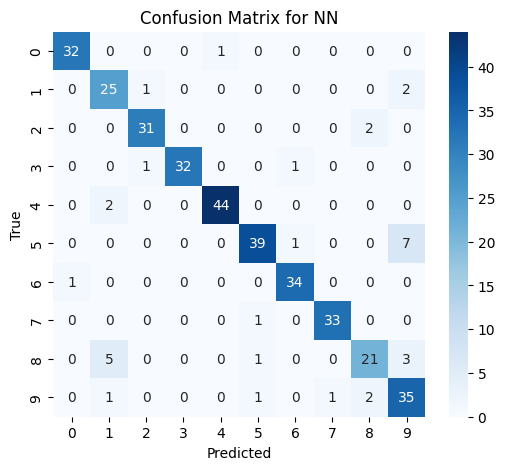

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load dataset
digits = load_digits()
X = digits.images
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
X_train = X_train / 16.0
X_test = X_test / 16.0

# One-hot encode labels
y_train_oh = LabelBinarizer().fit_transform(y_train)
y_test_oh = LabelBinarizer().fit_transform(y_test)

# Build a simple NN
model = Sequential([
    Flatten(input_shape=(8,8)),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train_oh, epochs=5, batch_size=32, verbose=0)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for NN")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


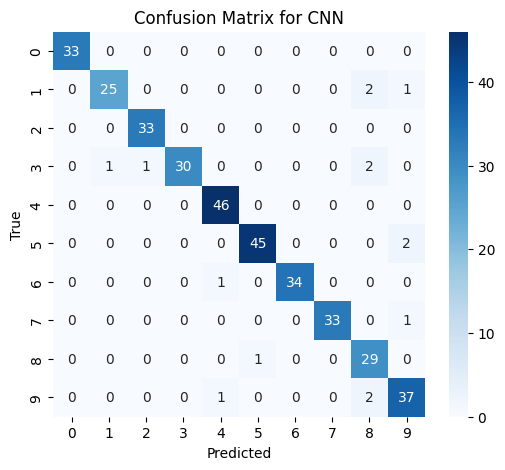

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------------
# 📌 1. Define dataset path
# -------------------------------
# Change this if your dataset is in Google Drive
dataset_path = "/content/dataset/flowers"   # 👈 check this folder contains subfolders like 'daisy', 'tulip', etc.

# -------------------------------
# 📌 2. Setup image size & batch
# -------------------------------
img_size = 224   # should match your training image size
batch_size = 32

# -------------------------------
# 📌 3. Create validation data generator
# -------------------------------
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# -------------------------------
# 📌 4. Get true labels
# -------------------------------
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

# -------------------------------
# 📌 5. Get predictions from CNN model
# -------------------------------
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# -------------------------------
# 📌 6. Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - CNN")
plt.show()